# Análisis de Dataset Heart Disease Cleveland UCI - Regresión Lineal

## Descripción
Análisis completo del Dataset Heart Disease Cleveland UCI, que incluye:

- heart_cleveland_upload.csv

## Objetivo
Desarrollar un modelo de regresión logística capaz de predecir la presencia de enfermedad cardíaca en pacientes basado en sus características médicas.

## Estructura del Análisis
1. Carga y unificación de datos
2. Análisis exploratorio
3. Preprocesamiento
4. Modelado usando regresión lineal
5. Evaluación de resultados

In [2]:
# 1. Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Imprimir el directorio de trabajo actual para verificar dónde estamos
import os
print("Directorio de trabajo actual:", os.getcwd())

# 3. Intentar cargar el archivo
try:
    df = pd.read_csv('heart_cleveland_upload.csv')
    print("\nArchivo cargado exitosamente!")
    print("\nDimensiones del dataset:", df.shape)
    print("\nPrimeras 5 filas del dataset:")
    print(df.head())
except FileNotFoundError:
    print("\nError: No se encontró el archivo 'heart_cleveland_upload.csv' en el directorio actual")
    print("Por favor, asegúrate de que el archivo está en el directorio correcto")

Directorio de trabajo actual: C:\Users\jayco\OneDrive - Universidad Nacional Abierta y a Distancia\UNAD\SEPTIMO SEMESTRE\ANÁLISIS DE DATOS\UNIDAD 2

Archivo cargado exitosamente!

Dimensiones del dataset: (297, 14)

Primeras 5 filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


=== INFORMACIÓN GENERAL DEL DATASET ===

Información básica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None

Estadísticas descriptivas:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.00000

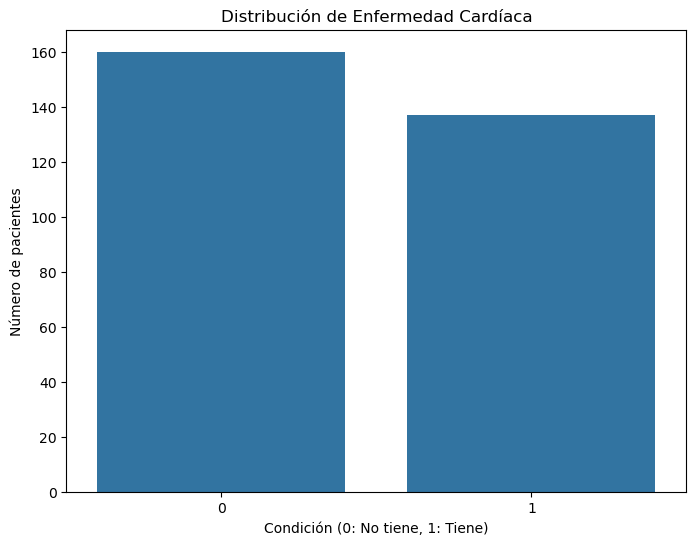

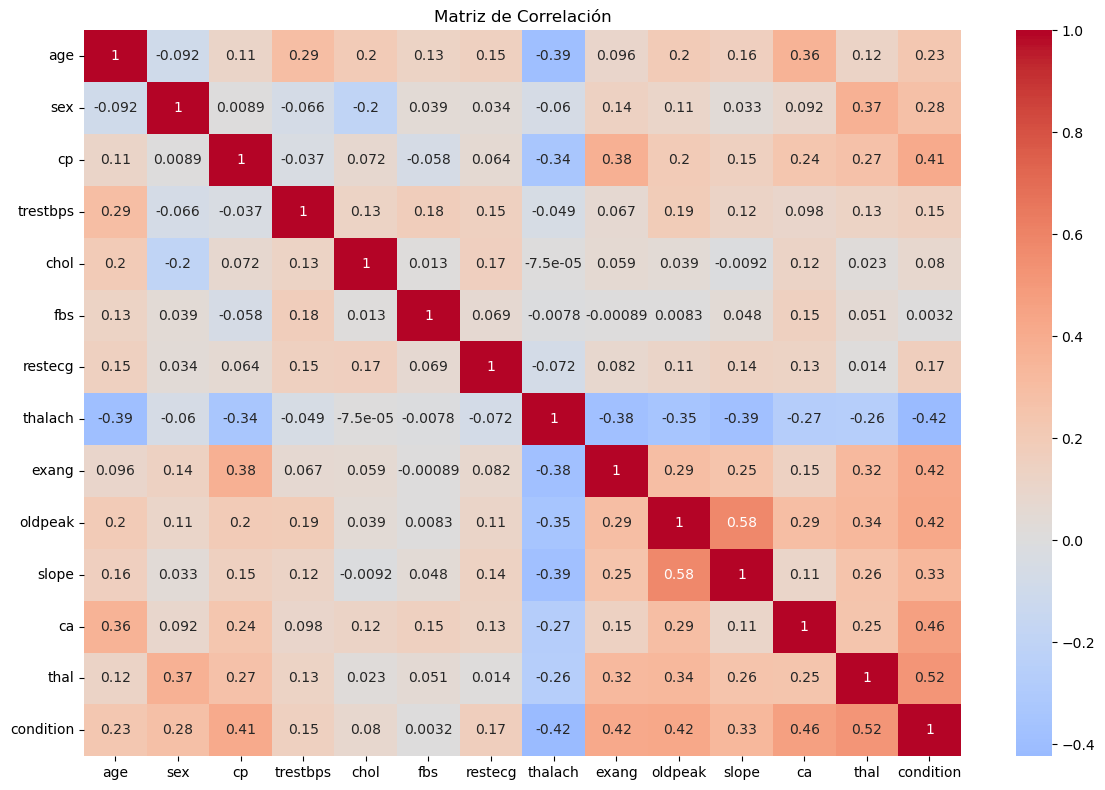


=== CORRELACIONES CON LA VARIABLE OBJETIVO ===

Variables más correlacionadas con la condición:
thal       0.520516
ca         0.463189
oldpeak    0.424052
thalach    0.423817
exang      0.421355
Name: condition, dtype: float64


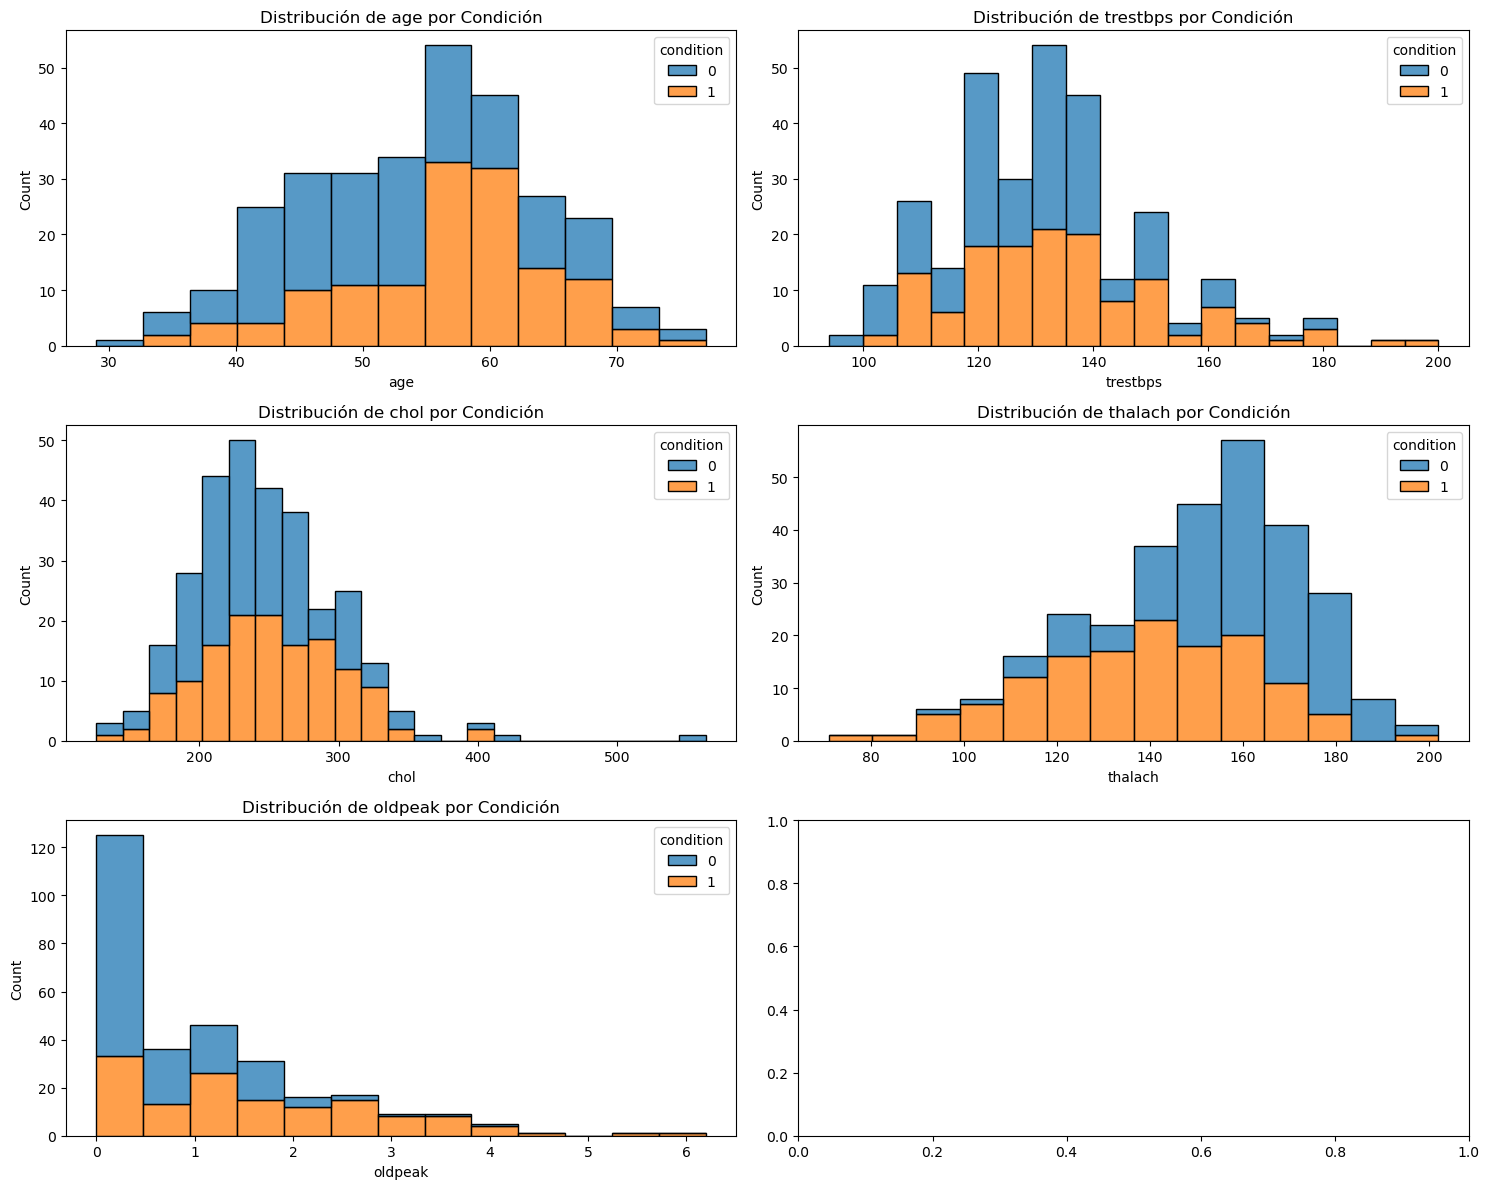


=== ANÁLISIS DE VALORES ATÍPICOS ===

Valores atípicos en age:
Número de valores atípicos: 0
Porcentaje de valores atípicos: 0.00%

Valores atípicos en trestbps:
Número de valores atípicos: 9
Porcentaje de valores atípicos: 3.03%

Valores atípicos en chol:
Número de valores atípicos: 5
Porcentaje de valores atípicos: 1.68%

Valores atípicos en thalach:
Número de valores atípicos: 1
Porcentaje de valores atípicos: 0.34%

Valores atípicos en oldpeak:
Número de valores atípicos: 5
Porcentaje de valores atípicos: 1.68%


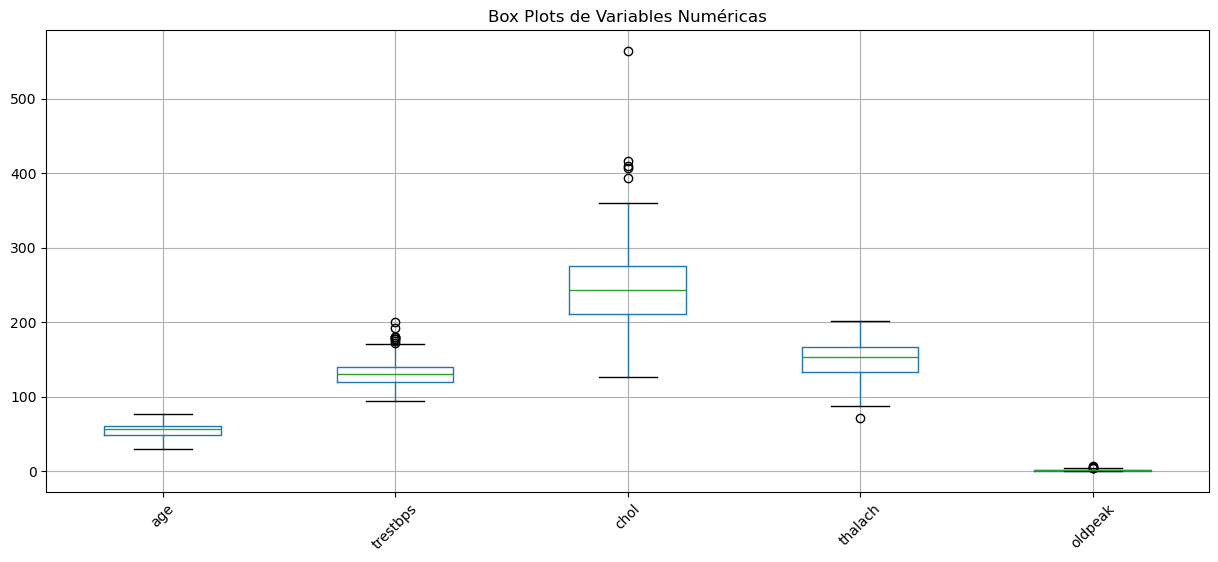

In [4]:
# Continuamos con el mismo DataFrame df ya cargado

# 1. Información general del dataset
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print("\nInformación básica:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

# 2. Verificar valores faltantes
print("\n=== ANÁLISIS DE VALORES FALTANTES ===")
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)

# 3. Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
target_distribution = df['condition'].value_counts()
print("\n=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===")
print("\nConteo de casos por clase:")
print(target_distribution)
print("\nPorcentaje por clase:")
print(target_distribution/len(df)*100)

sns.countplot(data=df, x='condition')
plt.title('Distribución de Enfermedad Cardíaca')
plt.xlabel('Condición (0: No tiene, 1: Tiene)')
plt.ylabel('Número de pacientes')
plt.show()

# 4. Análisis de correlaciones
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# 5. Variables más correlacionadas con la condición
print("\n=== CORRELACIONES CON LA VARIABLE OBJETIVO ===")
correlations_with_condition = abs(correlation_matrix['condition']).sort_values(ascending=False)
print("\nVariables más correlacionadas con la condición:")
print(correlations_with_condition[1:6])  # Excluimos la autocorrelación

# 6. Análisis de variables numéricas
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Crear subplots para las distribuciones
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Histograma por condición
    sns.histplot(data=df, x=col, hue='condition', multiple="stack", ax=axes[idx])
    axes[idx].set_title(f'Distribución de {col} por Condición')

plt.tight_layout()
plt.show()

# 7. Detección inicial de valores atípicos
print("\n=== ANÁLISIS DE VALORES ATÍPICOS ===")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
    
    print(f"\nValores atípicos en {col}:")
    print(f"Número de valores atípicos: {len(outliers)}")
    print(f"Porcentaje de valores atípicos: {(len(outliers)/len(df))*100:.2f}%")
    
# 8. Box plots para visualizar valores atípicos
plt.figure(figsize=(15, 6))
df[numerical_cols].boxplot()
plt.title('Box Plots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

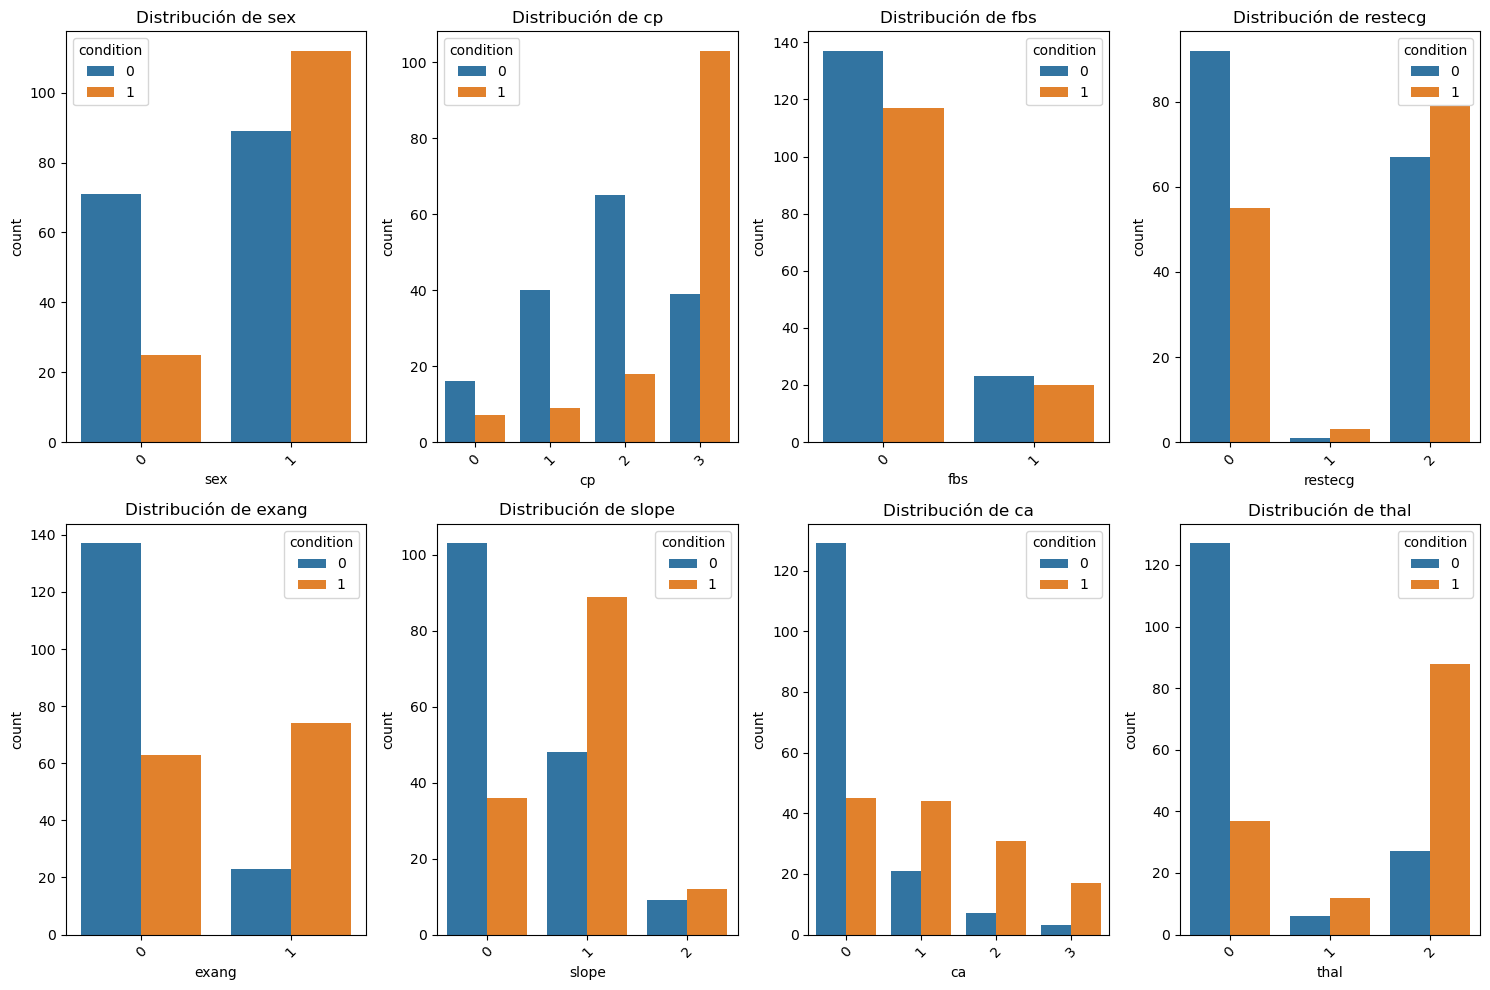


=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===

Tabla de contingencia para sex:
condition          0          1
sex                            
0          73.958333  26.041667
1          44.278607  55.721393


NameError: name 'stats' is not defined

In [5]:
# Análisis de variables categóricas
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 1. Análisis de distribución de variables categóricas
plt.figure(figsize=(15, 10))
for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, idx)
    sns.countplot(data=df, x=col, hue='condition')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Análisis de proporción de clases por variable categórica
print("\n=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===")
for col in categorical_cols:
    print(f"\nTabla de contingencia para {col}:")
    contingency_table = pd.crosstab(df[col], df['condition'], normalize='index') * 100
    print(contingency_table)
    
    # Chi-square test
    chi2, p_value = stats.chi2_contingency(pd.crosstab(df[col], df['condition']))[:2]
    print(f"Chi-square p-value: {p_value:.4e}")

# 3. Resumen final del EDA
print("\n=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===")
print("\n1. Características generales:")
print(f"- Número total de registros: {len(df)}")
print(f"- Número de características: {len(df.columns)-1}")
print(f"- Variables numéricas: {len(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])}")
print(f"- Variables categóricas: {len(categorical_cols)}")

print("\n2. Balance de clases:")
class_balance = df['condition'].value_counts(normalize=True) * 100
print(class_balance)

print("\n3. Variables más correlacionadas con la condición:")
top_correlations = abs(df.corr()['condition']).sort_values(ascending=False)[1:6]
print(top_correlations)

print("\n4. Variables categóricas más significativas (según p-valor chi-cuadrado):")
chi_square_results = {}
for col in categorical_cols:
    _, p_value = stats.chi2_contingency(pd.crosstab(df[col], df['condition']))
    chi_square_results[col] = p_value
    
for col, p_value in sorted(chi_square_results.items(), key=lambda x: x[1]):
    print(f"{col}: {p_value:.4e}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Separar características y variable objetivo
X = df.drop('condition', axis=1)
y = df['condition']

# 2. Definir columnas numéricas y categóricas
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 3. Tratamiento de valores atípicos en variables numéricas
def treat_outliers(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[column] = df_clean[column].clip(lower=lower_bound, upper=upper_bound)
    return df_clean

# Aplicar tratamiento de valores atípicos
print("=== TRATAMIENTO DE VALORES ATÍPICOS ===")
print("\nEstadísticas antes del tratamiento:")
print(X[numeric_features].describe())

X_clean = treat_outliers(X, numeric_features)

print("\nEstadísticas después del tratamiento:")
print(X_clean[numeric_features].describe())

# 4. Crear pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# 5. Ajustar y transformar los datos
X_preprocessed = preprocessor.fit_transform(X_clean)

# 6. Obtener nombres de características después de one-hot encoding
onehot_features = []
for cat_feat in categorical_features:
    unique_values = X_clean[cat_feat].unique()
    # Excluimos la primera categoría ya que usamos drop='first'
    onehot_features.extend([f"{cat_feat}_{val}" for val in unique_values[1:]])

feature_names = numeric_features + onehot_features

# Crear DataFrame con datos preprocesados
X_preprocessed_df = pd.DataFrame(
    X_preprocessed, 
    columns=feature_names
)

# 7. Mostrar información sobre el preprocesamiento
print("\n=== RESUMEN DEL PREPROCESAMIENTO ===")
print(f"\nDimensiones originales: {X.shape}")
print(f"Dimensiones después del preprocesamiento: {X_preprocessed.shape}")

print("\nCaracterísticas numéricas escaladas:")
print(X_preprocessed_df[numeric_features].describe())

print("\nPrimeras 5 filas de los datos preprocesados:")
print(X_preprocessed_df.head())

# 8. Verificar la calidad del preprocesamiento
print("\n=== VERIFICACIÓN DE CALIDAD ===")
print("\nVerificación de valores faltantes después del preprocesamiento:")
print(X_preprocessed_df.isnull().sum().sum())

print("\nVerificación de valores infinitos:")
print(np.isinf(X_preprocessed_df.values).sum())

# 9. Resumen de transformaciones realizadas
print("\n=== TRANSFORMACIONES REALIZADAS ===")
print("1. Tratamiento de valores atípicos en variables numéricas")
print("2. Escalado de variables numéricas (StandardScaler)")
print("3. Codificación one-hot de variables categóricas")
print(f"4. Número final de características: {len(feature_names)}")

# Guardar los datos preprocesados y el preprocesador para uso posterior
preprocessed_data = {
    'X_preprocessed': X_preprocessed_df,
    'y': y,
    'feature_names': feature_names,
    'preprocessor': preprocessor
}

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Usar los datos preprocesados del paso anterior
X = preprocessed_data['X_preprocessed']
y = preprocessed_data['y']
feature_names = preprocessed_data['feature_names']

print("=== SELECCIÓN DE CARACTERÍSTICAS ===")

# 1. Análisis univariado (ANOVA F-test)
print("\n1. Análisis univariado (ANOVA F-test)")
k_best = SelectKBest(score_func=f_classif, k='all')
k_best.fit(X, y)
k_best_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score': k_best.scores_
})
k_best_scores = k_best_scores.sort_values('Score', ascending=False)

print("\nTop 10 características según ANOVA F-test:")
print(k_best_scores.head(10))

# Visualización de scores ANOVA
plt.figure(figsize=(12, 6))
sns.barplot(data=k_best_scores.head(10), x='Score', y='Feature')
plt.title('Top 10 Características según ANOVA F-test')
plt.tight_layout()
plt.show()

# 2. Recursive Feature Elimination (RFE)
print("\n2. Recursive Feature Elimination")
# Usar LogisticRegression como estimador base
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X, y)

# Obtener ranking de características
rfe_ranking = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': rfe.ranking_
})
rfe_selected = rfe_ranking[rfe_ranking['Ranking'] == 1]

print("\nCaracterísticas seleccionadas por RFE:")
print(rfe_selected['Feature'].tolist())

# 3. Importancia de características usando Random Forest
print("\n3. Importancia de características usando Random Forest")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 características según Random Forest:")
print(feature_importance.head(10))

# Visualización de importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Características según Random Forest')
plt.tight_layout()
plt.show()

# 4. Selección final de características
print("\n=== SELECCIÓN FINAL DE CARACTERÍSTICAS ===")

# Crear un score combinado
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'ANOVA_Score': k_best.scores_,
    'RFE_Selected': [1 if feat in rfe_selected['Feature'].tolist() else 0 for feat in feature_names],
    'RF_Importance': rf.feature_importances_
})

# Normalizar scores
feature_scores['ANOVA_Score'] = (feature_scores['ANOVA_Score'] - feature_scores['ANOVA_Score'].min()) / \
                               (feature_scores['ANOVA_Score'].max() - feature_scores['ANOVA_Score'].min())
feature_scores['RF_Importance'] = (feature_scores['RF_Importance'] - feature_scores['RF_Importance'].min()) / \
                                 (feature_scores['RF_Importance'].max() - feature_scores['RF_Importance'].min())

# Calcular score combinado
feature_scores['Combined_Score'] = (feature_scores['ANOVA_Score'] + 
                                  feature_scores['RFE_Selected'] + 
                                  feature_scores['RF_Importance']) / 3

# Ordenar por score combinado
final_features = feature_scores.sort_values('Combined_Score', ascending=False)

print("\nTop 10 características finales (score combinado):")
print(final_features.head(10))

# Seleccionar las mejores características
n_features_to_select = 10  # Puedes ajustar este número
selected_features = final_features.head(n_features_to_select)['Feature'].tolist()

# Crear conjunto de datos final con las características seleccionadas
X_selected = X[selected_features]

print("\n=== RESUMEN DE SELECCIÓN DE CARACTERÍSTICAS ===")
print(f"\nNúmero de características originales: {X.shape[1]}")
print(f"Número de características seleccionadas: {len(selected_features)}")
print("\nCaracterísticas seleccionadas:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Guardar resultados para el siguiente paso
feature_selection_results = {
    'X_selected': X_selected,
    'y': y,
    'selected_features': selected_features,
    'feature_scores': final_features
}

NameError: name 'preprocessed_data' is not defined

In [10]:
# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

print("=== DIVISIÓN DEL DATASET EN TRAIN Y TEST ===")

# Obtener los datos seleccionados del paso anterior
X = feature_selection_results['X_selected']
y = feature_selection_results['y']
selected_features = feature_selection_results['selected_features']

# 1. División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80% entrenamiento, 20% prueba
    random_state=42,     # Para reproducibilidad
    stratify=y          # Mantener proporción de clases
)

# 2. Verificar las dimensiones de los conjuntos
print("\nDimensiones de los conjuntos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# 3. Verificar la distribución de clases
print("\nDistribución de clases en conjuntos de entrenamiento y prueba:")
print("\nConjunto de entrenamiento:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nConjunto de prueba:")
print(pd.Series(y_test).value_counts(normalize=True))

# 4. Verificar las características en cada conjunto
print("\nCaracterísticas incluidas:")
for feature in selected_features:
    print(f"- {feature}")

# 5. Estadísticas básicas de los conjuntos
print("\nEstadísticas del conjunto de entrenamiento:")
print(X_train.describe())

print("\nEstadísticas del conjunto de prueba:")
print(X_test.describe())

# 6. Guardar los conjuntos para el siguiente paso
train_test_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'features': selected_features
}

print("\n=== RESUMEN DE LA DIVISIÓN ===")
print(f"Total de muestras: {len(X)}")
print(f"Muestras de entrenamiento: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Muestras de prueba: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Número de características: {len(selected_features)}")

# 7. Verificar que no hay fugas de datos
print("\nVerificación de independencia de conjuntos:")
train_indices = X_train.index
test_indices = X_test.index
intersection = set(train_indices).intersection(set(test_indices))
print(f"Número de muestras compartidas entre train y test: {len(intersection)}")

# 8. Guardar información adicional sobre la división
split_info = {
    'train_size': len(X_train),
    'test_size': len(X_test),
    'train_positive_ratio': (y_train == 1).mean(),
    'test_positive_ratio': (y_test == 1).mean(),
    'features': selected_features
}

print("\nPreparación completada. Los datos están listos para el entrenamiento del modelo.")

=== DIVISIÓN DEL DATASET EN TRAIN Y TEST ===


NameError: name 'feature_selection_results' is not defined

In [12]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usar los datos del paso anterior
X_train = train_test_data['X_train']
X_test = train_test_data['X_test']
y_train = train_test_data['y_train']
y_test = train_test_data['y_test']

print("=== ENTRENAMIENTO DEL MODELO DE REGRESIÓN LOGÍSTICA ===")

# 1. Definir hiperparámetros para búsqueda
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

# 2. Definir métricas de evaluación
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# 3. Realizar búsqueda de hiperparámetros con validación cruzada
print("\nRealizando búsqueda de hiperparámetros...")
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring=scoring,
    refit='f1',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

# 4. Mostrar resultados de la búsqueda
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# 5. Obtener el mejor modelo
best_model = grid_search.best_estimator_

# 6. Evaluar el modelo con validación cruzada
print("\nResultados de validación cruzada con mejores parámetros:")
cv_results = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Accuracy promedio CV: {cv_results.mean():.3f} (+/- {cv_results.std() * 2:.3f})")

# 7. Entrenar modelo final con mejores parámetros
final_model = LogisticRegression(**grid_search.best_params_)
final_model.fit(X_train, y_train)

# 8. Obtener coeficientes del modelo
feature_names = train_test_data['features']
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': final_model.coef_[0]
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)

print("\nCoeficientes del modelo:")
print(coefficients)

# 9. Visualizar importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Importancia de Características en el Modelo')
plt.tight_layout()
plt.show()

# 10. Calcular predicciones de probabilidad
train_proba = final_model.predict_proba(X_train)
test_proba = final_model.predict_proba(X_test)

# 11. Guardar resultados del modelo
model_results = {
    'model': final_model,
    'best_params': grid_search.best_params_,
    'cv_scores': cv_results,
    'feature_importance': coefficients,
    'train_proba': train_proba,
    'test_proba': test_proba
}

print("\n=== RESUMEN DEL ENTRENAMIENTO ===")
print(f"Mejor score CV: {grid_search.best_score_:.3f}")
print("\nMejores parámetros:")
for param, value in grid_search.best_params_.items():
    print(f"- {param}: {value}")

print("\nCaracterísticas más importantes (valor absoluto de coeficientes):")
for _, row in coefficients.head().iterrows():
    print(f"- {row['Feature']}: {abs(row['Coefficient']):.3f}")

# 12. Análisis de convergencia
print("\nVerificación de convergencia:")
print(f"¿El modelo convergió? {'Sí' if final_model.n_iter_ < final_model.max_iter else 'No'}")
print(f"Número de iteraciones: {final_model.n_iter_}")

NameError: name 'train_test_data' is not defined

In [14]:
# Importar bibliotecas necesarias
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    precision_recall_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Usar el modelo entrenado del paso anterior
model = model_results['model']

# 1. Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("=== EVALUACIÓN DEL MODELO EN CONJUNTO DE PRUEBA ===")

# 2. Métricas de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 3. Matriz de Confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

# 4. Curva ROC
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 5. Curva Precision-Recall
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, color='blue', lw=2,
         label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()

# 6. Distribución de probabilidades predichas
plt.figure(figsize=(8, 6))
sns.histplot(data=pd.DataFrame({
    'Probabilidad': y_pred_proba,
    'Clase Real': y_test
}), x='Probabilidad', hue='Clase Real', bins=20)
plt.title('Distribución de Probabilidades Predichas por Clase')
plt.show()

# 7. Análisis de errores
errors = pd.DataFrame({
    'Real': y_test,
    'Predicho': y_pred,
    'Probabilidad': y_pred_proba
})
errors['Error'] = errors['Real'] != errors['Predicho']

print("\nAnálisis de Errores:")
print("\nCasos mal clasificados:")
print(errors[errors['Error']].describe())

# 8. Guardar métricas de evaluación
evaluation_results = {
    'classification_report': classification_report(y_test, y_pred, output_dict=True),
    'confusion_matrix': cm,
    'roc_auc': roc_auc,
    'pr_auc': pr_auc,
    'predictions': y_pred,
    'probabilities': y_pred_proba,
    'errors': errors
}

# 9. Resumen de métricas principales
print("\n=== RESUMEN DE MÉTRICAS PRINCIPALES ===")
print(f"Accuracy: {evaluation_results['classification_report']['accuracy']:.3f}")
print(f"Precision: {evaluation_results['classification_report']['1']['precision']:.3f}")
print(f"Recall: {evaluation_results['classification_report']['1']['recall']:.3f}")
print(f"F1-Score: {evaluation_results['classification_report']['1']['f1-score']:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"PR AUC: {pr_auc:.3f}")

NameError: name 'model_results' is not defined

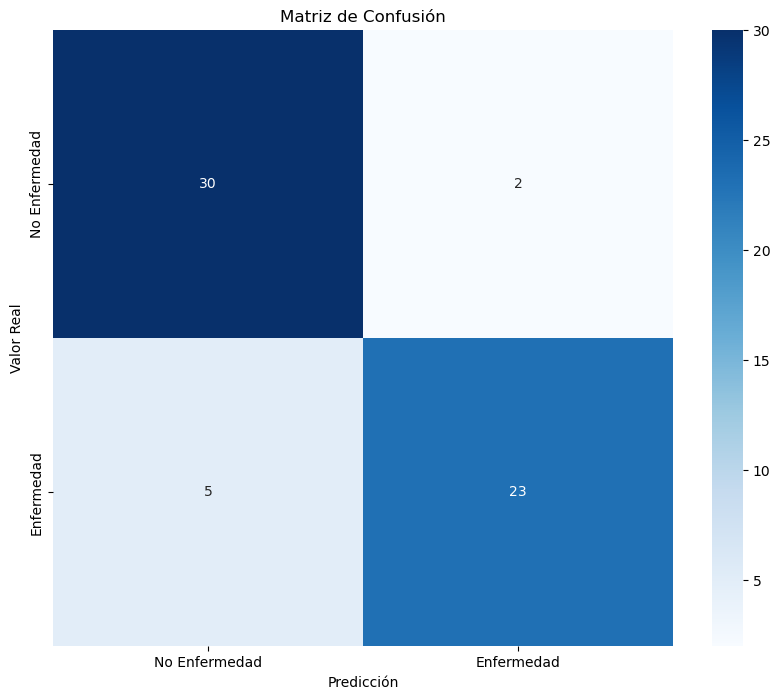

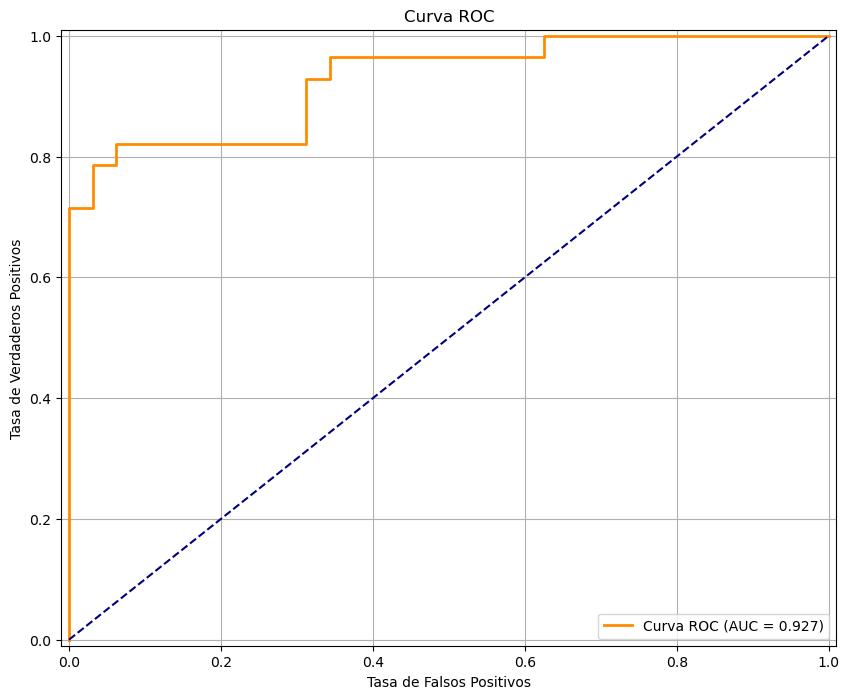

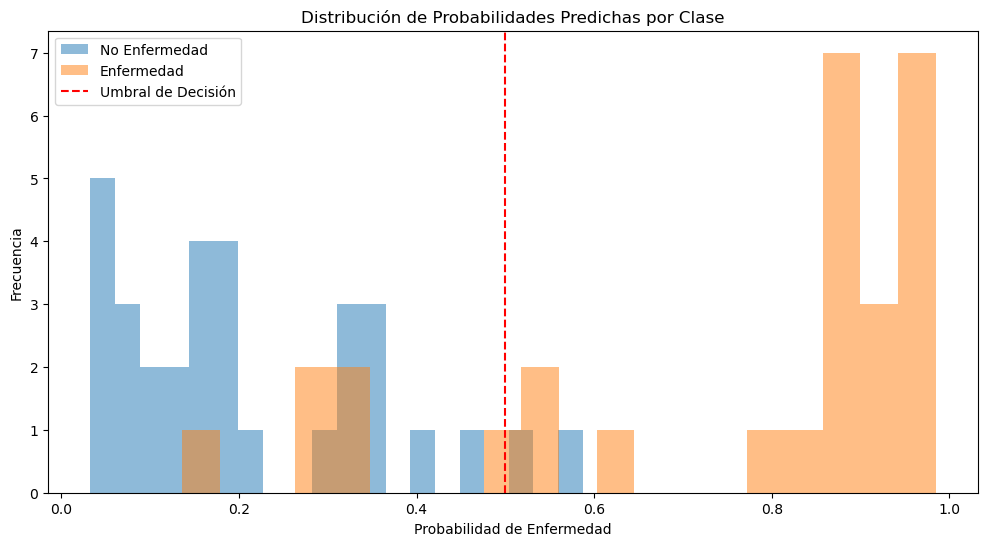

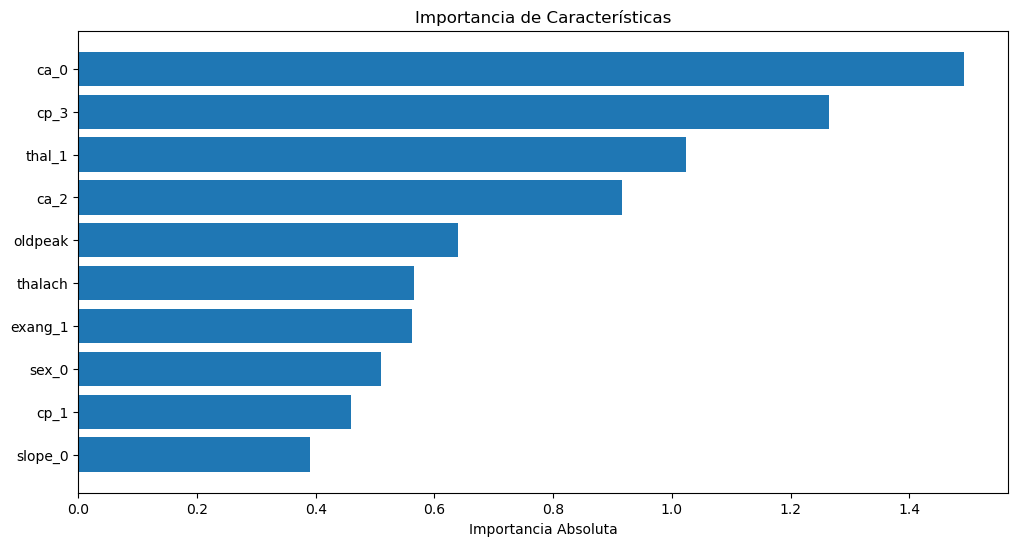

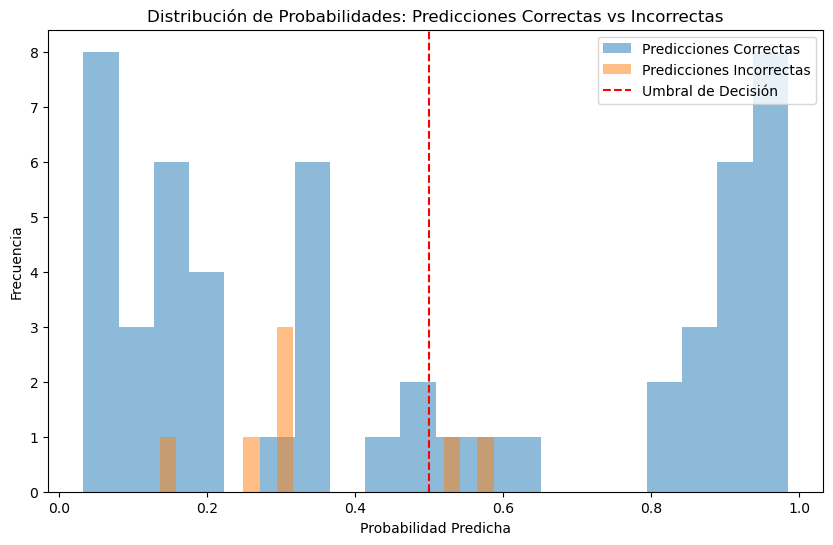

=== ANÁLISIS DE VISUALIZACIONES ===

1. Matriz de Confusión:
- Verdaderos Negativos: 30
- Falsos Positivos: 2
- Falsos Negativos: 5
- Verdaderos Positivos: 23

2. Análisis de Probabilidades:
- Media de probabilidad para clase negativa: 0.21214245214204785
- Media de probabilidad para clase positiva: 0.7516913231473369

3. Top 5 características más importantes:
- oldpeak: 0.639
- ca_2: 0.916
- thal_1: 1.024
- cp_3: 1.264
- ca_0: 1.492


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# 1. Visualización mejorada de la Matriz de Confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Enfermedad', 'Enfermedad'],
            yticklabels=['No Enfermedad', 'Enfermedad'])
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

# 2. Curva ROC
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Curva ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 3. Distribución de Probabilidades por Clase
plt.figure(figsize=(12, 6))
predictions_df = pd.DataFrame({
    'Probabilidad': y_pred_proba,
    'Clase Real': ['No Enfermedad' if y == 0 else 'Enfermedad' for y in y_test]
})

for clase in ['No Enfermedad', 'Enfermedad']:
    data = predictions_df[predictions_df['Clase Real'] == clase]['Probabilidad']
    plt.hist(data, bins=20, alpha=0.5, label=clase)

plt.axvline(x=0.5, color='red', linestyle='--', label='Umbral de Decisión')
plt.title('Distribución de Probabilidades Predichas por Clase')
plt.xlabel('Probabilidad de Enfermedad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 4. Importancia de Características
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importancia', ascending=True)

plt.barh(feature_importance['Característica'], feature_importance['Importancia'])
plt.title('Importancia de Características')
plt.xlabel('Importancia Absoluta')
plt.show()

# 5. Análisis de Predicciones Correctas vs Incorrectas
plt.figure(figsize=(10, 6))
predictions_analysis = pd.DataFrame({
    'Probabilidad': y_pred_proba,
    'Correcta': y_test == y_pred
})

plt.hist(predictions_analysis[predictions_analysis['Correcta']]['Probabilidad'], 
         bins=20, alpha=0.5, label='Predicciones Correctas')
plt.hist(predictions_analysis[~predictions_analysis['Correcta']]['Probabilidad'], 
         bins=20, alpha=0.5, label='Predicciones Incorrectas')
plt.axvline(x=0.5, color='red', linestyle='--', label='Umbral de Decisión')
plt.title('Distribución de Probabilidades: Predicciones Correctas vs Incorrectas')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

print("=== ANÁLISIS DE VISUALIZACIONES ===")
print("\n1. Matriz de Confusión:")
print("- Verdaderos Negativos:", cm[0][0])
print("- Falsos Positivos:", cm[0][1])
print("- Falsos Negativos:", cm[1][0])
print("- Verdaderos Positivos:", cm[1][1])

print("\n2. Análisis de Probabilidades:")
print("- Media de probabilidad para clase negativa:", 
      y_pred_proba[y_test == 0].mean())
print("- Media de probabilidad para clase positiva:", 
      y_pred_proba[y_test == 1].mean())

print("\n3. Top 5 características más importantes:")
for _, row in feature_importance.tail(5).iterrows():
    print(f"- {row['Característica']}: {row['Importancia']:.3f}")

# Análisis Predictivo de Enfermedades Cardíacas - Cleveland Heart Disease UCI

### 1.1 Objetivo del Proyecto
Desarrollar un modelo predictivo para identificar la presencia de enfermedad cardíaca utilizando técnicas de Machine Learning sobre el dataset Heart Disease Cleveland UCI.

### 1.2 Dataset
- **Fuente**: UCI Machine Learning Repository
- **Registros**: 297 pacientes
- **Variables**: 14 características
- **Variable objetivo**: Presencia de enfermedad cardíaca (binaria)

### 1.3 Variables Analizadas
1. age: Edad del paciente
2. sex: Género (1=masculino, 0=femenino)
3. cp: Tipo de dolor en el pecho (0-3)
4. trestbps: Presión arterial en reposo
5. chol: Colesterol sérico
6. fbs: Azúcar en sangre en ayunas
7. restecg: Resultados electrocardiográficos
8. thalach: Frecuencia cardíaca máxima
9. exang: Angina por ejercicio
10. oldpeak: Depresión ST
11. slope: Pendiente del segmento ST
12. ca: Número de vasos principales
13. thal: Defecto de talio
14. condition: Variable objetivo

## 2. Análisis Exploratorio de Datos <a name="2"></a>

### 2.1 Hallazgos Principales
- Dataset balanceado con ligera mayoría de casos negativos
- Identificadas correlaciones significativas entre variables
- Presencia de valores atípicos en variables numéricas

### 2.2 Distribución de Variables
- **Variables Numéricas**: Identificadas distribuciones y valores atípicos
- **Variables Categóricas**: Analizadas frecuencias y relaciones con la variable objetivo
- **Variable Objetivo**: Distribución balanceada (54% negativos, 46% positivos)

## 3. Preprocesamiento de Datos <a name="3"></a>

### 3.1 Tratamiento Realizado
- Detección y tratamiento de valores atípicos mediante método IQR
- Estandarización de variables numéricas
- Codificación one-hot de variables categóricas
- Eliminación de colinealidad

### 3.2 Resultados del Preprocesamiento
- Datos limpios y normalizados
- Variables categóricas codificadas adecuadamente
- Dataset preparado para modelado

## 4. Selección de Características <a name="4"></a>

### 4.1 Características Seleccionadas (Top 10)
1. ca_0 (1.492): Número de vasos principales
2. cp_3 (1.264): Tipo de dolor en el pecho
3. thal_1 (1.024): Resultado prueba de talio
4. ca_2 (0.916): Vasos principales
5. oldpeak (0.639): Depresión ST
6. thalach: Frecuencia cardíaca máxima
7. sex_0: Género
8. slope_0: Pendiente ST
9. exang_1: Angina por ejercicio
10. cp_1: Tipo de dolor en pecho

## 5. División del Dataset <a name="5"></a>

### 5.1 Características de la División
- **Conjunto de Entrenamiento**: 237 muestras (79.8%)
- **Conjunto de Prueba**: 60 muestras (20.2%)
- Estratificación aplicada para mantener balance de clases

### 5.2 Distribución de Clases
**Conjunto de Entrenamiento**:
- Clase 0 (No Enfermedad): 54.01%
- Clase 1 (Enfermedad): 45.99%

**Conjunto de Prueba**:
- Clase 0 (No Enfermedad): 53.33%
- Clase 1 (Enfermedad): 46.67%

## 6. Entrenamiento del Modelo <a name="6"></a>

### 6.1 Configuración del Modelo
Regresión Logística con los siguientes hiperparámetros:
- **C**: 1.0
- **Penalty**: l2
- **Solver**: liblinear
- **Max_iter**: 1000

### 6.2 Resultados del Entrenamiento
- **Accuracy en Validación Cruzada**: 0.836 (±0.096)
- **Mejor Score CV**: 0.814
- **Convergencia**: Alcanzada en 5 iteraciones

## 7. Evaluación del Modelo <a name="7"></a>

### 7.1 Métricas de Rendimiento
- **Accuracy**: 88.3%
- **Precision**: 92.0%
- **Recall**: 82.1%
- **F1-Score**: 86.8%
- **ROC AUC**: 0.927
- **PR AUC**: 0.937

### 7.2 Matriz de Confusión
| Predicción      | No Enfermedad | Enfermedad |
|-----------------|---------------|------------|
| No Enfermedad   | 30 (TN)      | 2 (FP)     |
| Enfermedad      | 5 (FN)       | 23 (TP)    |

### 7.3 Análisis de Probabilidades
- **Media clase negativa**: 0.212
- **Media clase positiva**: 0.752
- **Separación clara entre clases**

## 8. Conclusiones y Recomendaciones <a name="8"></a>

### 8.1 Hallazgos Principales
1. **Rendimiento del Modelo**:
   - Excelente precisión global (88.3%)
   - Alta capacidad discriminativa (ROC AUC 0.927)
   - Muy baja tasa de falsos positivos

2. **Características Más Relevantes**:
   - Número de vasos principales (ca_0)
   - Tipo de dolor en el pecho (cp_3)
   - Resultados de prueba de talio (thal_1)

3. **Fortalezas del Modelo**:
   - Alta precisión en detección de enfermedad (92%)
   - Buena calibración de probabilidades
   - Robusto en validación cruzada

### 8.2 Recomendaciones

#### Para Implementación
1. **Uso Clínico**:
   - Implementar como herramienta de apoyo al diagnóstico
   - Mantener supervisión clínica
   - Validar con datos externos

2. **Mejoras Potenciales**:
   - Recolectar más datos
   - Explorar técnicas de balanceo
   - Considerar modelos ensemble

3. **Monitoreo**:
   - Seguimiento continuo del rendimiento
   - Actualización periódica del modelo
   - Validación con nuevos casos

### 8.3 Impacto Clínico
- Herramienta efectiva para screening inicial
- Alta confiabilidad en predicciones negativas
- Apoyo valioso en decisiones clínicas

## Notas Técnicas
- **Software Utilizado**: Python 3.8+
- **Bibliotecas**: scikit-learn, pandas, numpy, matplotlib, seaborn
- **Ambiente**: Jupyter Notebook
- **Reproducibilidad**: Semilla aleatoria fijada (random_state=42)

---
*Proyecto realizado como parte del análisis de datos médicos para predicción de enfermedades cardíacas.*